## Title: Tutorial 1 in-class exercise Python Version 
**Author**: [YOU] and Haohan Chen \\
**Purpose**: Try out Python programming! \\
**Last update**: 09/13/2021 \\

 ## Notes:   
    ## Note 1:
    # Writing a piece of Python code is like writing an article.
    # You can write an article --> You can write Python code.
    # You will master the skill.

    ## Note 2: 
    # Whatever starting with "#" are "comments", meaning they are not executable code
    # They are there to explain to your code's reader what your code does.
    # Sometimes, when you write some code and wants to temporally remove them
    # but want to keep them just in case you need them again. You can also add "#" 
    # to make them "comments." This is common practice.

    ## Note 3: 
    # How to execute each line of code? (those that does not start with #)
        # Move your point to the line of interest
        # For Both Mac & Windows user -- Hit Shift + ENTER
        # If you want to execute multiple lines of code, select the lines, then 
        # do the above.

    ## Note 3:
    # In your code, write as many comments as you want. Always good to document
    # your thought process, references, etc.
    # You can clean up before you submit it share it.



## EDA

In [ ]:
# import packages
## package information:
## Pandas: https://pandas.pydata.org/
## Numpy: https://numpy.org/
## Seaborn: https://seaborn.pydata.org/
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Download COVID-19 data online
# Data source: https://data.gov.hk/en-data/dataset/hk-dh-chpsebcddr-novel-infectious-agent/resource/944f76e7-4351-4d1a-8d22-924160afe8f9

####################################################################################
##### R Version:
##### url <- "http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv"
##### download.file(url, "data/covid_data.csv")
####################################################################################
url =  "http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv"

raw_covid = pd.read_csv(url)

In [ ]:
## Let's check how the data look like:


####################################################################################
##### R Version:
## Preview this dataset
#d_raw
#
## View this dataset
#View(d_raw)
#
####################################################################################
raw_covid.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56.0,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [ ]:
####################################################################################
##### R Version:
# See the names of variables
#names(d_raw)
####################################################################################
raw_covid.columns

Index(['Case no.', 'Report date', 'Date of onset', 'Gender', 'Age',
       'Name of hospital admitted', 'Hospitalised/Discharged/Deceased',
       'HK/Non-HK resident', 'Case classification*', 'Confirmed/probable'],
      dtype='object')

In [ ]:
raw_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12152 entries, 0 to 12151
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Case no.                          12152 non-null  int64  
 1   Report date                       12152 non-null  object 
 2   Date of onset                     12147 non-null  object 
 3   Gender                            12147 non-null  object 
 4   Age                               12147 non-null  float64
 5   Name of hospital admitted         0 non-null      float64
 6   Hospitalised/Discharged/Deceased  12147 non-null  object 
 7   HK/Non-HK resident                12147 non-null  object 
 8   Case classification*              12147 non-null  object 
 9   Confirmed/probable                12152 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 949.5+ KB


In [ ]:
####################################################################################
##### R Version:
#d <- d_raw %>%
#    mutate(`Report date` = dmy(`Report date`)) %>%
#    mutate(`Date of onset` = dmy(`Date of onset`))
####################################################################################

raw_covid[['Report date','Date of onset']] = raw_covid[['Report date','Date of onset']].apply(pd.to_datetime, errors='coerce')

### Visualization

Text(0.5, -0.2, 'Data source: data.gov.hk.  \nGraph by: [YOUR NAME] and Haohan Chen at DaSPPA')

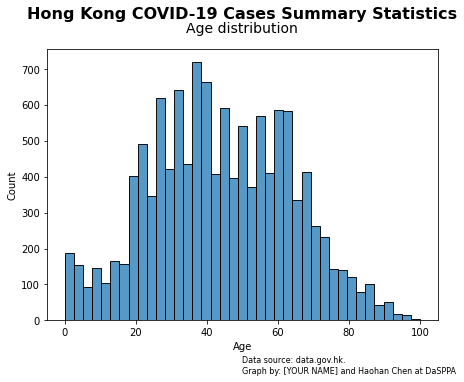

In [ ]:
#============= Visualize the data ==============

####################################################################################
## Age distribution ---------
#d %>%
#    ggplot(aes(x = Age)) +
#    geom_histogram() +
#    labs(
#        title = "Hong Kong COVID-19 Cases Summary Statistics",
#        subtitle = "Age distribution",
#        caption = "Data source: data.gov.hk.   Graph by: [YOUR NAME] and Haohan Chen at DaSPPA"
#    )
#ggsave("figures/age_distribution.pdf", width = 5, height = 4) # Save the figure to your folder
# "width = 5, height = 4" controls the size of the figures. units are "inch." Play with them. 
#
## Download the figure: Click the [Files] pane --> figures folder --> 
## check the box in front of "age_distribution.pdf" --> click "More" --> "Export" 
####################################################################################

###This is what Python is not good at
###I do not make many adjustment to let you feel how Python's default setting is less aesthetic than R

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.histplot(data=raw_covid, x="Age")
ax.text(x=0.5, y=1.1, s='Hong Kong COVID-19 Cases Summary Statistics', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Age distribution', fontsize=14, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=.5, y=-.2, s='Data source: data.gov.hk.  \nGraph by: [YOUR NAME] and Haohan Chen at DaSPPA', fontsize=8, ha='left', va='bottom', transform=ax.transAxes)

Text(0.6, -0.2, 'Data source: data.gov.hk.  \nGraph by: [YOUR NAME] and Haohan Chen at DaSPPA')

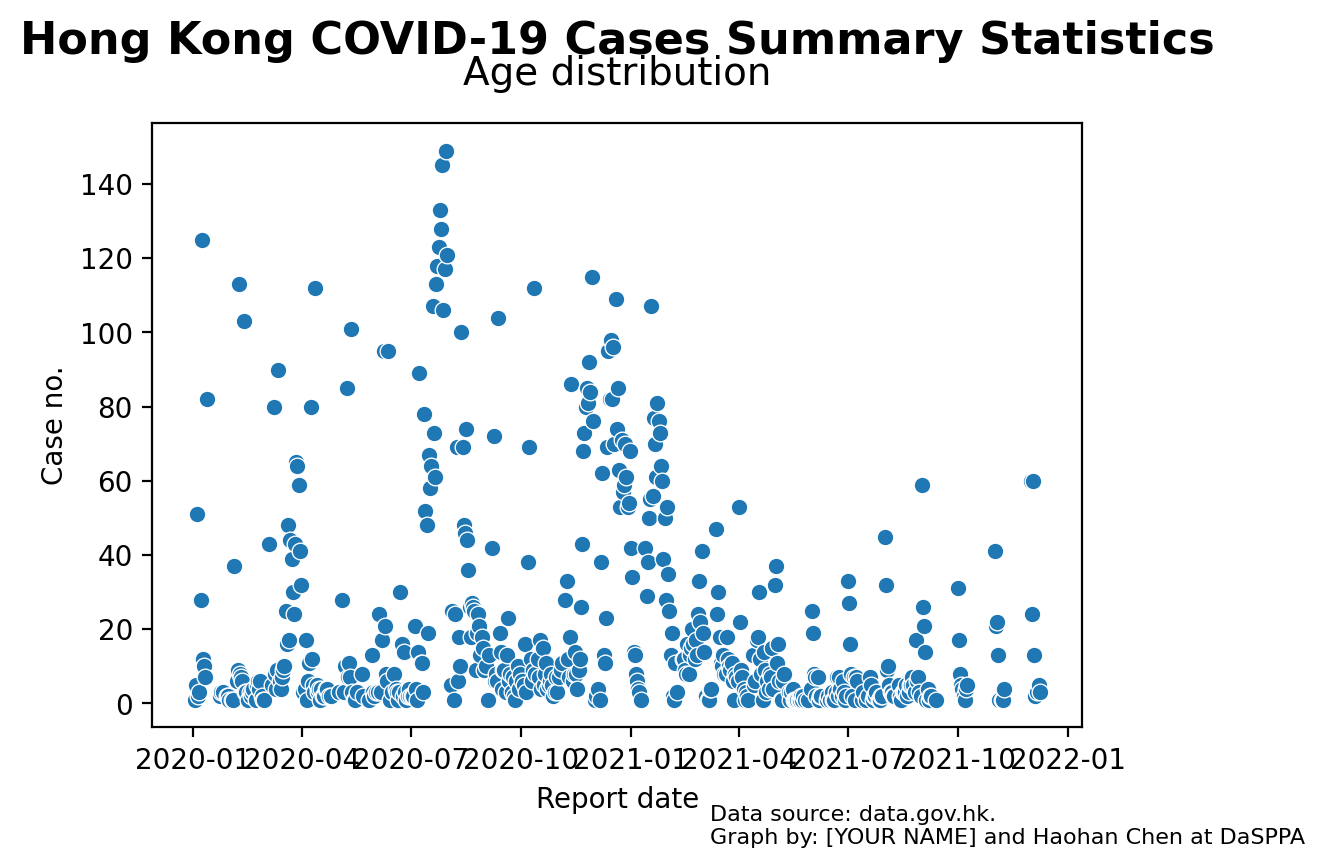

In [ ]:
####################################################################################
# Number of cases per day ----------
#d %>%
#    # The chunk below 
#    group_by(`Report date`) %>%
#    summarise(`Number of cases` = n()) %>%
#    ggplot(aes(x = `Report date`, y = `Number of cases`)) +
#    geom_point() +
#    labs(
#        title = "Hong Kong COVID-19 Summary Statistics",
#        subtitle = "Number of cases by date",
#        caption = "Data source: data.gov.hk.   Graph by [YOUR NAME] and Haohan Chen at DaSPPA."
#    )
#ggsave("figures/fig_time_series.pdf", width = 5, height = 4) # Save the figure to your folder
####################################################################################

covid_cases_day = raw_covid.groupby(['Report date']).count()

fig, ax = plt.subplots(dpi=200)
ax =sns.scatterplot(x="Report date", y="Case no.",
                data=covid_cases_day)
ax.text(x=0.5, y=1.1, s='Hong Kong COVID-19 Cases Summary Statistics', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Age distribution', fontsize=14, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=.6, y=-.2, s='Data source: data.gov.hk.  \nGraph by: [YOUR NAME] and Haohan Chen at DaSPPA', fontsize=8, ha='left', va='bottom', transform=ax.transAxes)


Text(0.6, -0.2, 'Data source: data.gov.hk.  \nGraph by: [YOUR NAME] and Haohan Chen at DaSPPA')

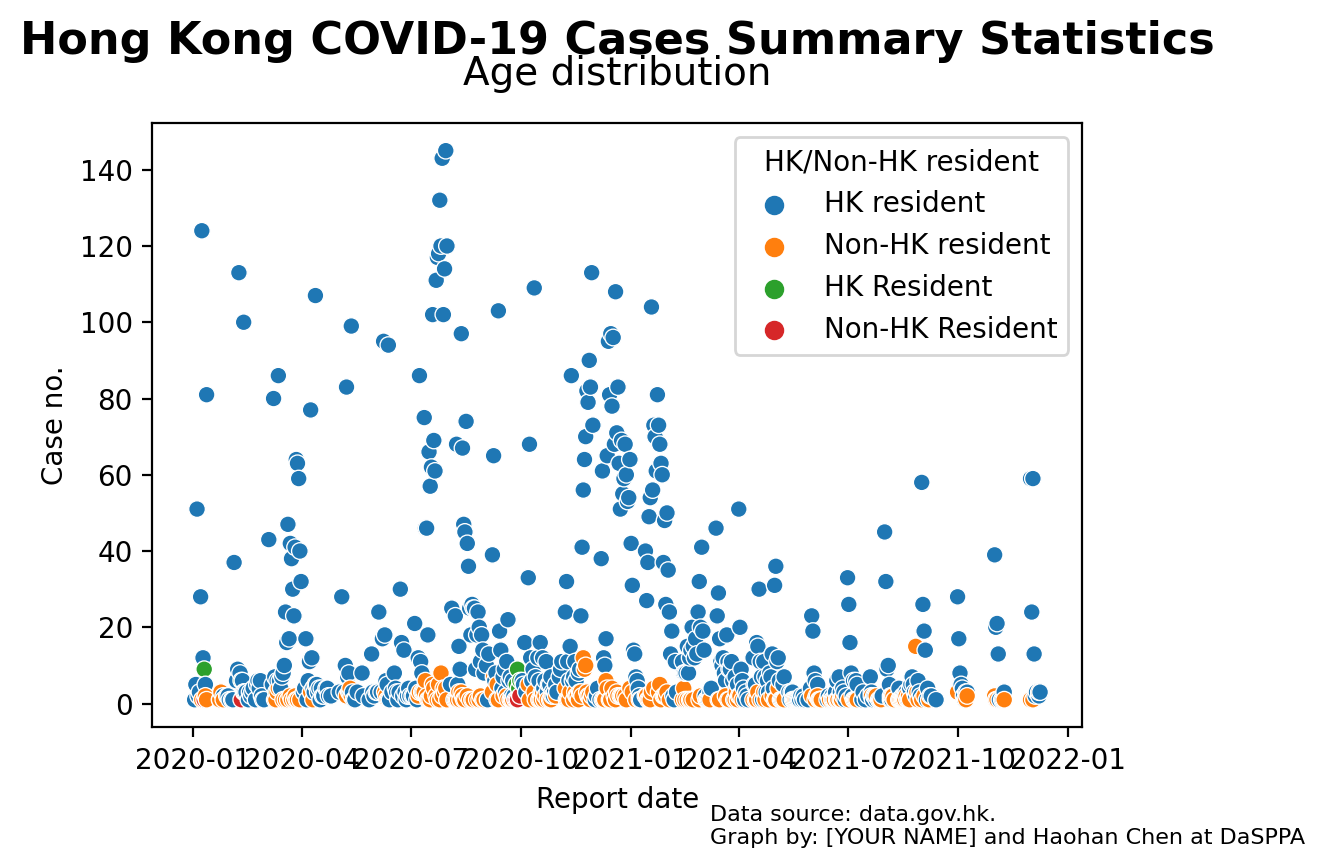

In [ ]:
####################################################################################
# Number of cases per day by case classification -----------
#d %>%
#    # Below we calculate the number of cases per day by residency. START
#    group_by(`Report date`, `HK/Non-HK resident`) %>%
#    summarise(`Number of cases` = n()) %>%
#    # END
#    ggplot(aes(x = `Report date`, y = `Number of cases`, color = `HK/Non-HK resident`)) +
#    geom_point() +
#    labs(
#        title = "Hong Kong COVID-19 Summary Statistics",
#        subtitle = "Number of cases by date",
#        caption = "Data source: data.gov.hk.   Graph by [YOUR NAME] and Haohan Chen."
#    )
#ggsave("figures/fig_time_series_by_residency.pdf", width = 6, height = 4)
####################################################################################

covid_cases = raw_covid.groupby(['Report date', 'HK/Non-HK resident']).count()

fig, ax = plt.subplots(dpi=200)
ax =sns.scatterplot(x="Report date", y="Case no.",
                hue="HK/Non-HK resident", 
                data=covid_cases)
ax.text(x=0.5, y=1.1, s='Hong Kong COVID-19 Cases Summary Statistics', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Age distribution', fontsize=14, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=.6, y=-.2, s='Data source: data.gov.hk.  \nGraph by: [YOUR NAME] and Haohan Chen at DaSPPA', fontsize=8, ha='left', va='bottom', transform=ax.transAxes)


Text(0.6, -0.2, 'Data source: data.gov.hk.  \nGraph by: [YOUR NAME] and Haohan Chen at DaSPPA')

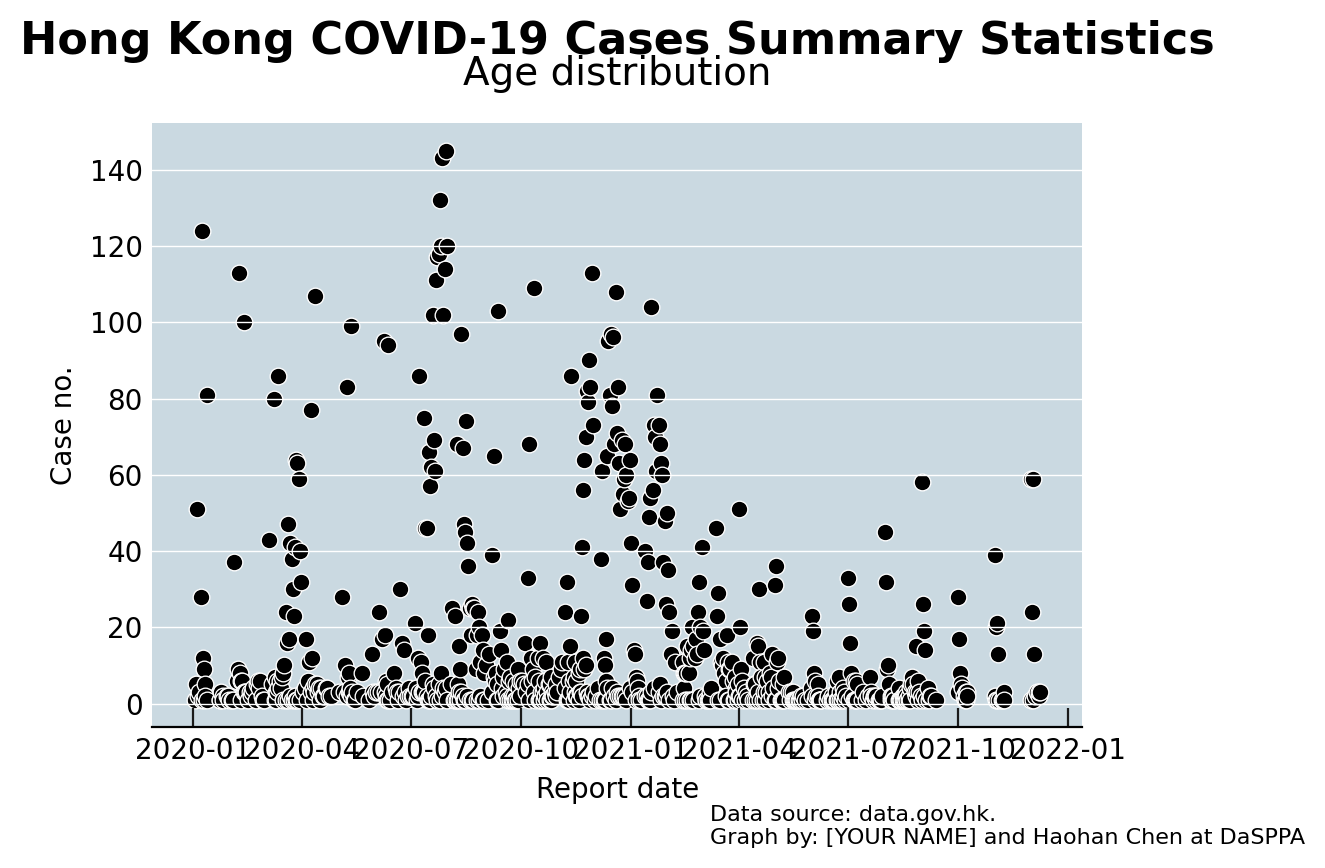

In [ ]:
####################################################################################
# ============== Want to make Economist/WSJ/NYTimes figures? ==================
#
# Install a package that helps you plot fancy figures
#library(ggthemes)
#
# Number of cases per day by case classification (Economist plot) -----------
#d %>%
#    # The chunk below 
#    group_by(`Report date`) %>%
#    summarise(`Number of cases` = n()) %>%
#    ggplot(aes(x = `Report date`, y = `Number of cases`)) +
#    geom_point() +
#    labs(
#        title = "Hong Kong COVID-19 Summary Statistics",
#        subtitle = "Number of cases by date",
#        caption = "Data source: data.gov.hk.   Graph by [YOUR NAME] and Haohan Chen at DaSPPA."
#    ) +
#    theme_economist()
#ggsave("figures/fig_time_series_economist.pdf", width = 6, height = 5)
####################################################################################


fig, ax = plt.subplots(dpi=200)
ax.set_facecolor('#CAD9E1')
ax.yaxis.grid(color='#ffffff', linewidth=.5)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', length=0)
ax.xaxis.set_ticks_position('bottom')
# Lengthen the bottom x-ticks and set them to dark gray
ax.tick_params(direction='in', axis='x', length=7, color='0.1')
ax =sns.scatterplot(x="Report date", y="Case no.",  color = '#000000',
                data=covid_cases)
ax.text(x=0.5, y=1.1, s='Hong Kong COVID-19 Cases Summary Statistics', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Age distribution', fontsize=14, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=.6, y=-.2, s='Data source: data.gov.hk.  \nGraph by: [YOUR NAME] and Haohan Chen at DaSPPA', fontsize=8, ha='left', va='bottom', transform=ax.transAxes)


Text(0.6, -0.2, 'Data source: data.gov.hk.  \nGraph by: [YOUR NAME] and Haohan Chen at DaSPPA')

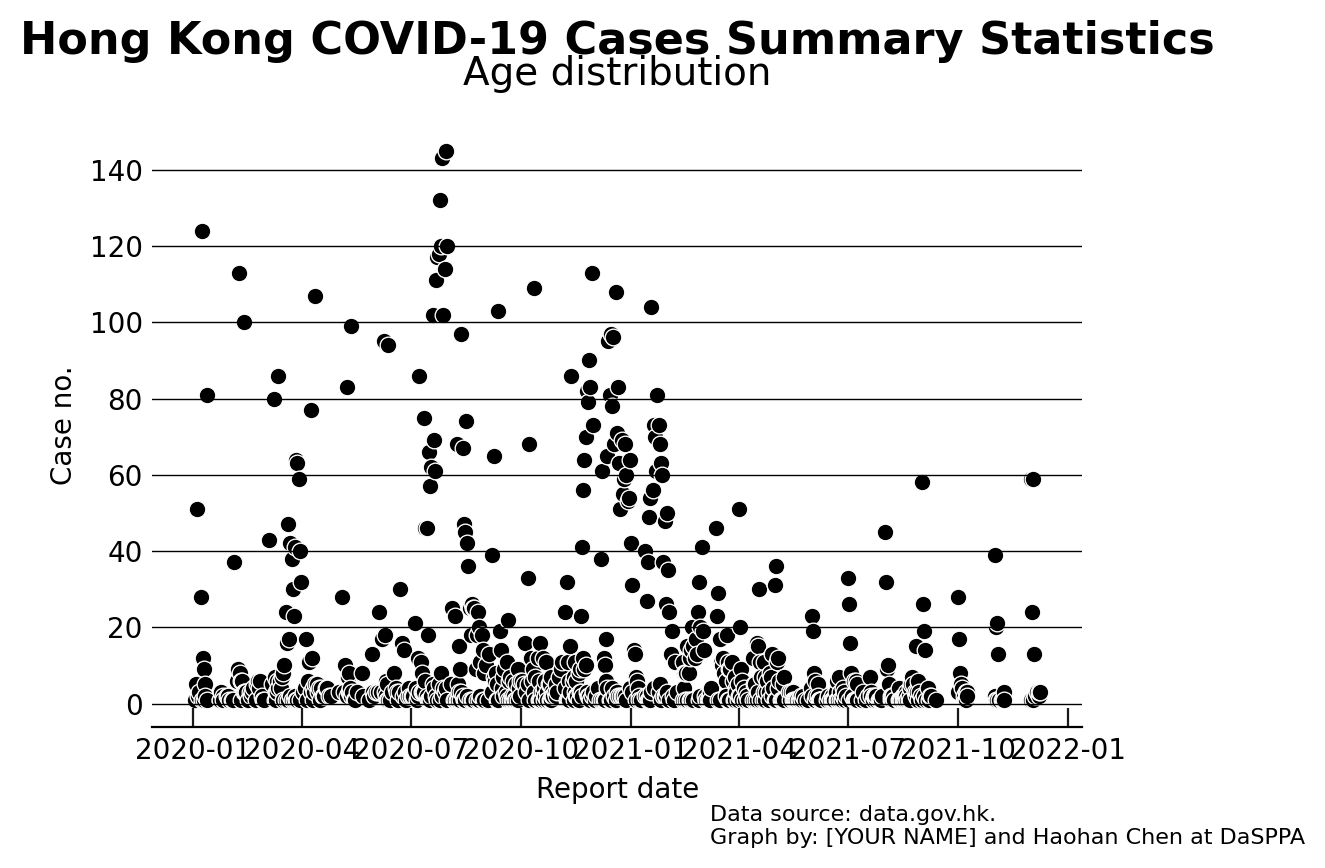

In [ ]:
####################################################################################
#d %>%
#    # The chunk below 
#    group_by(`Report date`) %>%
#    summarise(`Number of cases` = n()) %>%
#    ggplot(aes(x = `Report date`, y = `Number of cases`)) +
#    geom_point() +
#    labs(
#        title = "Hong Kong COVID-19 Summary Statistics",
#        subtitle = "Number of cases by date",
#        caption = "Data source: data.gov.hk.   Graph by [YOUR NAME] and Haohan Chen at DaSPPA."
#    ) +
#    theme_economist_white()
#ggsave("figures/fig_time_series_economist_white.pdf", width = 6, height = 5)
####################################################################################

fig, ax = plt.subplots(dpi=200)
#ax.set_facecolor('#CAD9E1')
ax.yaxis.grid(color='#000000', linewidth=.5)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', length=0)
ax.xaxis.set_ticks_position('bottom')
# Lengthen the bottom x-ticks and set them to dark gray
ax.tick_params(direction='in', axis='x', length=7, color='0.1')
ax =sns.scatterplot(x="Report date", y="Case no.", color = '#000000',
                data=covid_cases)
ax.text(x=0.5, y=1.1, s='Hong Kong COVID-19 Cases Summary Statistics', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Age distribution', fontsize=14, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=.6, y=-.2, s='Data source: data.gov.hk.  \nGraph by: [YOUR NAME] and Haohan Chen at DaSPPA', fontsize=8, ha='left', va='bottom', transform=ax.transAxes)



Text(0.6, -0.2, 'Data source: data.gov.hk.  \nGraph by: [YOUR NAME] and Haohan Chen at DaSPPA')

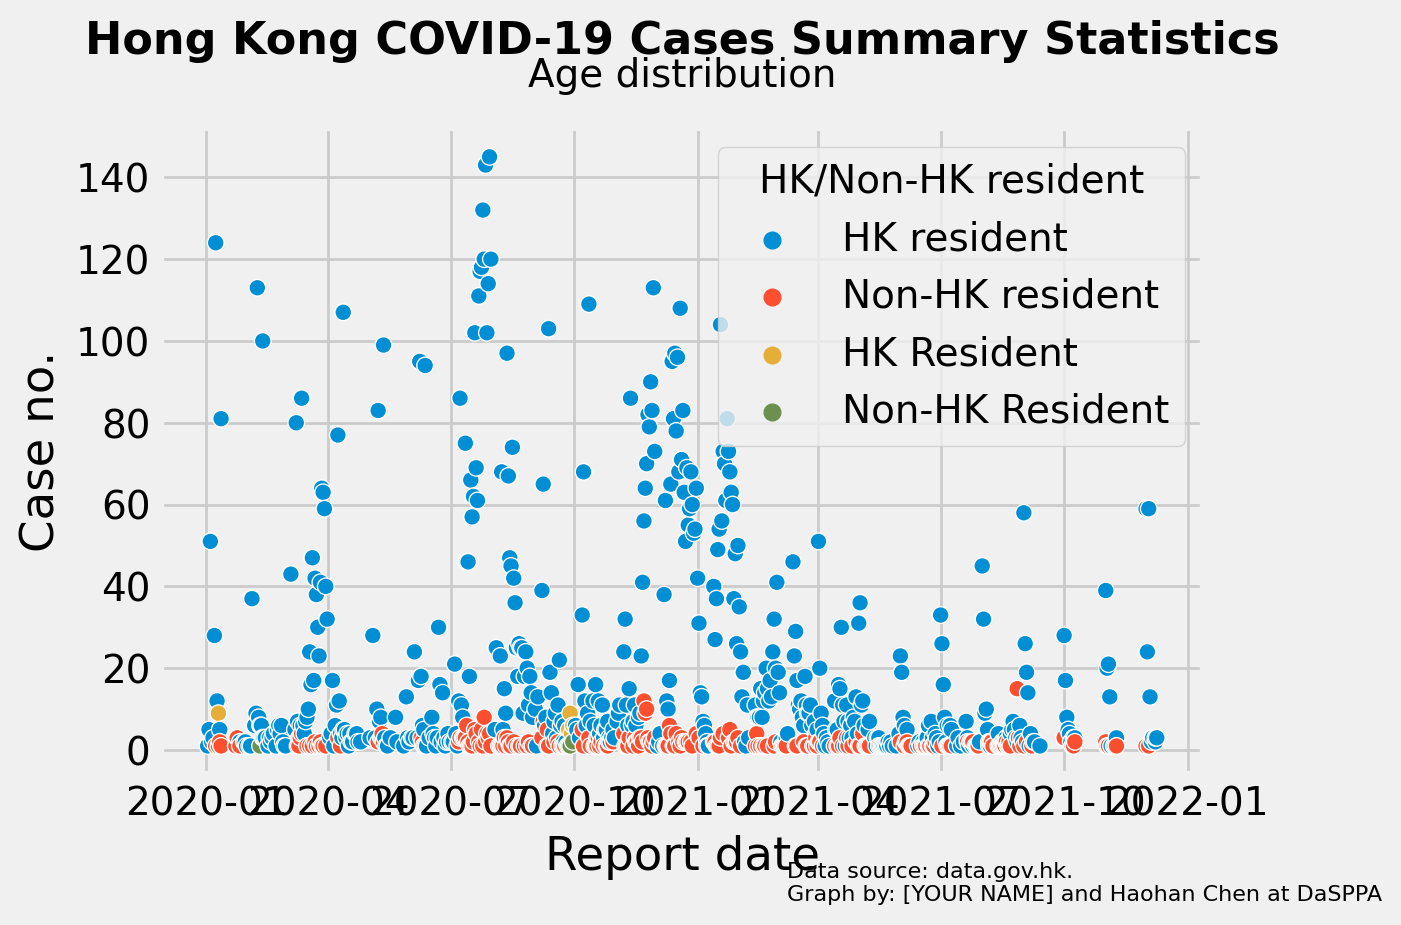

In [ ]:
### Much easier if you wanna "538 Style": 
plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(dpi=200)
ax =sns.scatterplot(x="Report date", y="Case no.",
                hue="HK/Non-HK resident", 
                data=covid_cases)
ax.text(x=0.5, y=1.1, s='Hong Kong COVID-19 Cases Summary Statistics', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Age distribution', fontsize=14, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=.6, y=-.2, s='Data source: data.gov.hk.  \nGraph by: [YOUR NAME] and Haohan Chen at DaSPPA', fontsize=8, ha='left', va='bottom', transform=ax.transAxes)





## Exercise 
    - In-class exercise 1: Modify the visualization code to add your name.
    
    - In-class exercise 2: Download the figures and insert them into a local document.
    
    - In-class exercise 3: In group, suggest a modification to a current figure. 
    - See you can do it.
    - In-class exercise 4: In group, suggest a figure that you think should be drawn 
    - using the data. See if Dr. Chen can do it (!)
    - In-class exercise 5: In group, discuss: Is there any good compared to doing it in excel?

